# Salman Baig
Student ID-0660467

### Investigation Assignment

Investigate the name of an image enhancement technique and explain:

#### a) What is the technique used for and what is an example of its application?

Image Enhancement techniques which improves the quality (clarity) of images for human viewing, removing blurring and noise, increasing contrast, and revealing details are examples of enhancement operations i.e.

•	This techniques are generally used to provide a clearer image.
•	Image enhancement can serve two purposes: to improve the visibility of feature to allow a human observer(radiologist) to make a more accurate diagnosis or better extract information, or to prepare the image for the next processing steps.
The most common image enhancement operators are:

1-Pixel value remapping: This includes linear or nonlinear contrast enhancement, histogram stretching, and histogram equalization.

2-Filtering. Filters amplify or attenuate specific characteristics of an image, and filters make use of the pixel neighborhood. Filters can be used to sharpen edges or smooth an image, to suppress periodic artifacts, or to remove an inhomogeneous background intensity distribution.

•	A specific form of image enhancement is image restoration, a specific filtering technique where a degradation process is assumed to be known.


#### b) Find a function in Python that can provide this functionality. Give the syntax and explain the parameters of this function?

The ImageFilter module contains a number of pre-defined enhancement filters that can be used with the filter method.
Example: Applying filter

import ImageEnhance

enh = ImageEnhance.Contrast(im)

enh.enhance(1.3).show("30% more contrast")

#### c) Can this particular technique have an application on medical images? If so, which modality uses this enhancement?

•	This techniques are used to extract meaningful information from medical images. A major concern in de-noising low-field MR brain images is the poor quality images secondary to a worsening signal-to-noise ratio (SNR) compared with the high-field MRI scanners.

•	Low-field Magnetic Resonance Imaging (MRI) is vital in sensitive surgeries to allow real-time imaging in the operation theatre.

•	Image enhancement techniques used to develop the visual appearance of images from Magnetic Resonance Image (MRI) and the enhancing brain volumes were aligned linear and this image is contrast. The enhancement operate are eliminate of film artifacts and labels, filtering of images.

•	There are more number of enhancement techniques such as Median filter, Gabor Filter, Gaussian Filter, low pass filter and Prewitt edge-finding filter.

#### d) Provide a scientific paper that uses or proposes this image enhancement technique?

##### Noise removal using fourth-order partial differential equation with applications to medical magnetic resonance images in space and time

##### Abstract
We introduce a new method for image smoothing based on a fourth-order PDE model. The method is tested on a broad range of real medical magnetic resonance images, both in space and time, as well as on nonmedical synthesized test images. Our algorithm demonstrates good noise suppression without destruction of important anatomical or functional detail, even at poor signal-to-noise ratio. We have also compared our method with related PDE models [1]


### Jupyter Notebook for Image Processing

#### Q1- Provide a screen-shot of the Notebook 05ImageRendering where a diﬀerent clip limit has been used to render the image?
 

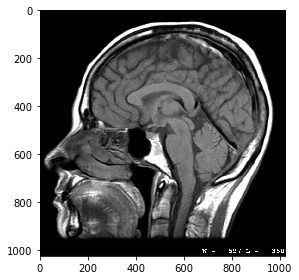

Original (8-bit encoding) the range is: 255


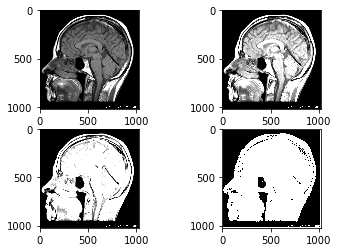

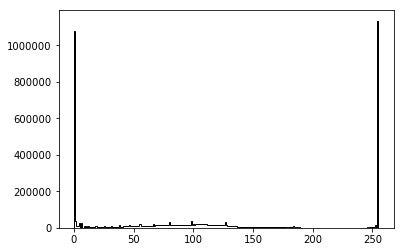

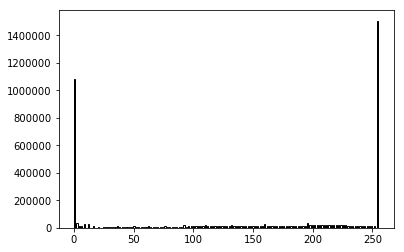

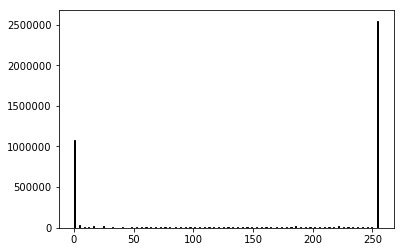

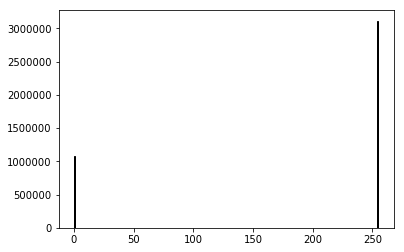

In [16]:
%matplotlib inline
from skimage import novice, data, io, exposure
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

#the simplest way to open and display an image uses the novice module from skimage
brainpic = novice.open('braincomplete.png')
brainpic.show()

#however, we will use instead the matplotlib image modules to obtain arrays that we can manipulate
#the 8-bit data in the PNG will be converted to floating point data between 0 and 1 by imread
#unless you ask it to Flatten=True
brainpicarray = mpimg.imread('braincomplete.png','True') 
print('Original (8-bit encoding) the range is: '+str(np.max(brainpicarray))) #showing max value in the image
bp=plt.subplot(221)
plt.imshow(brainpicarray)

#this here only adjust the reduction in coded bits in the image
#we will use Jm where we reduce the encoding to only values between 0 and 200' Km up to 100 and finally Lm up to 50
Jm=exposure.rescale_intensity(brainpicarray,in_range=(0, pow(2,7)-1)) #reducing encoding
Km=exposure.rescale_intensity(brainpicarray,in_range=(0, pow(2,6)-1)) #reducing encoding
Lm=exposure.rescale_intensity(brainpicarray,in_range=(0, pow(2,1)-1)) #reducing to 1 bit
plt.subplot(222)
plt.imshow(Jm)
plt.subplot(223)
plt.imshow(Km)
plt.subplot(224)
plt.imshow(Lm)

plt.figure()
ht=plt.hist(brainpicarray.ravel(), bins=256, histtype='step', color='black')
plt.figure()
ht=plt.hist(Jm.ravel(), bins=256, histtype='step', color='black')
plt.figure()
ht=plt.hist(Km.ravel(), bins=256, histtype='step', color='black')
plt.figure()
ht=plt.hist(Lm.ravel(), bins=256, histtype='step', color='black')

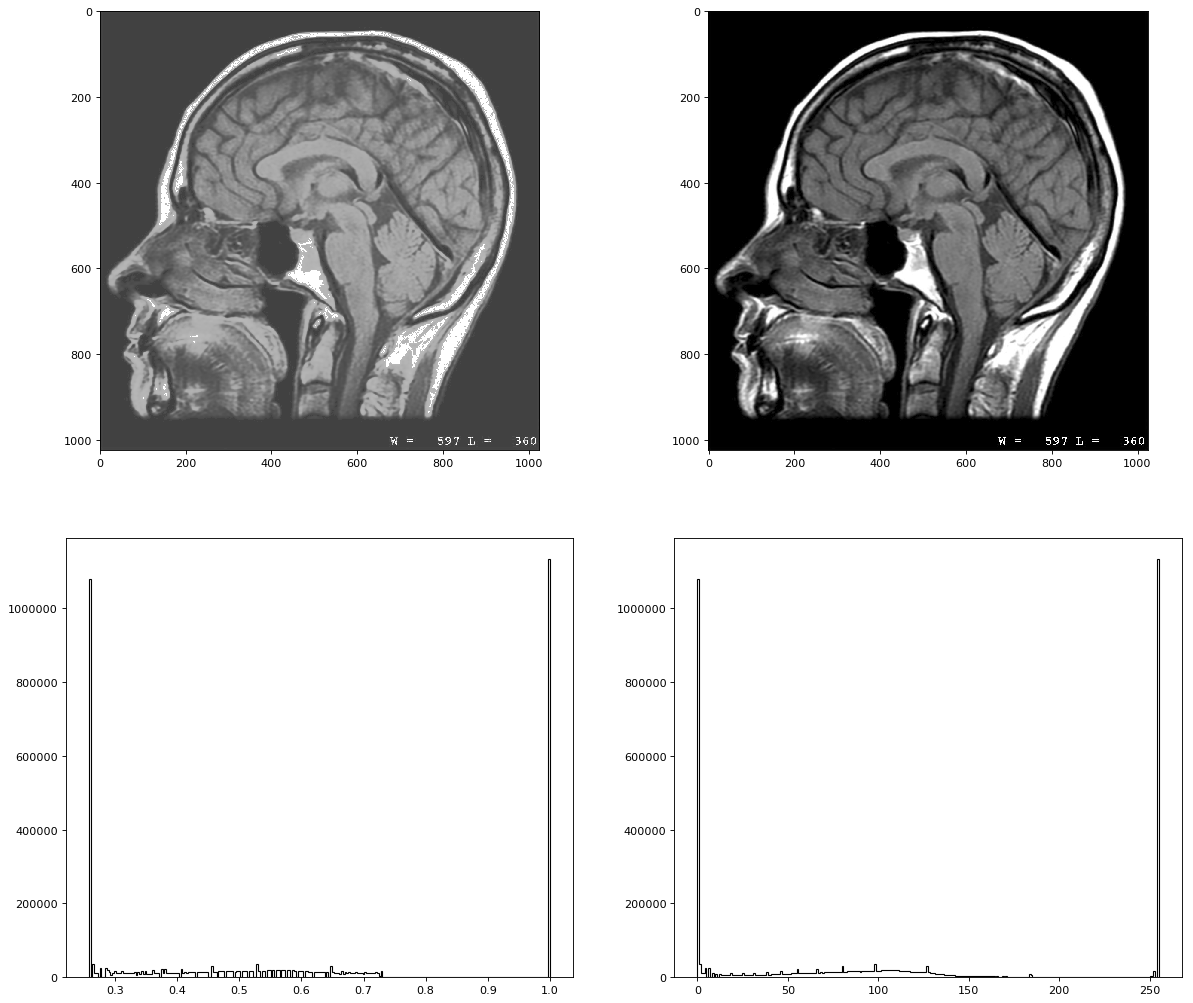

In [17]:
fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
img_eq = exposure.equalize_hist(brainpicarray)
plt.subplot(221)
plt.imshow(img_eq)
plt.subplot(222)
plt.imshow(brainpicarray)
plt.subplot(223)
ht=plt.hist(img_eq.ravel(), bins=256, histtype='step', color='black')
plt.subplot(224)
ht=plt.hist(brainpicarray.ravel(), bins=256, histtype='step', color='black')


C:\ProgramData\Anaconda3\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))


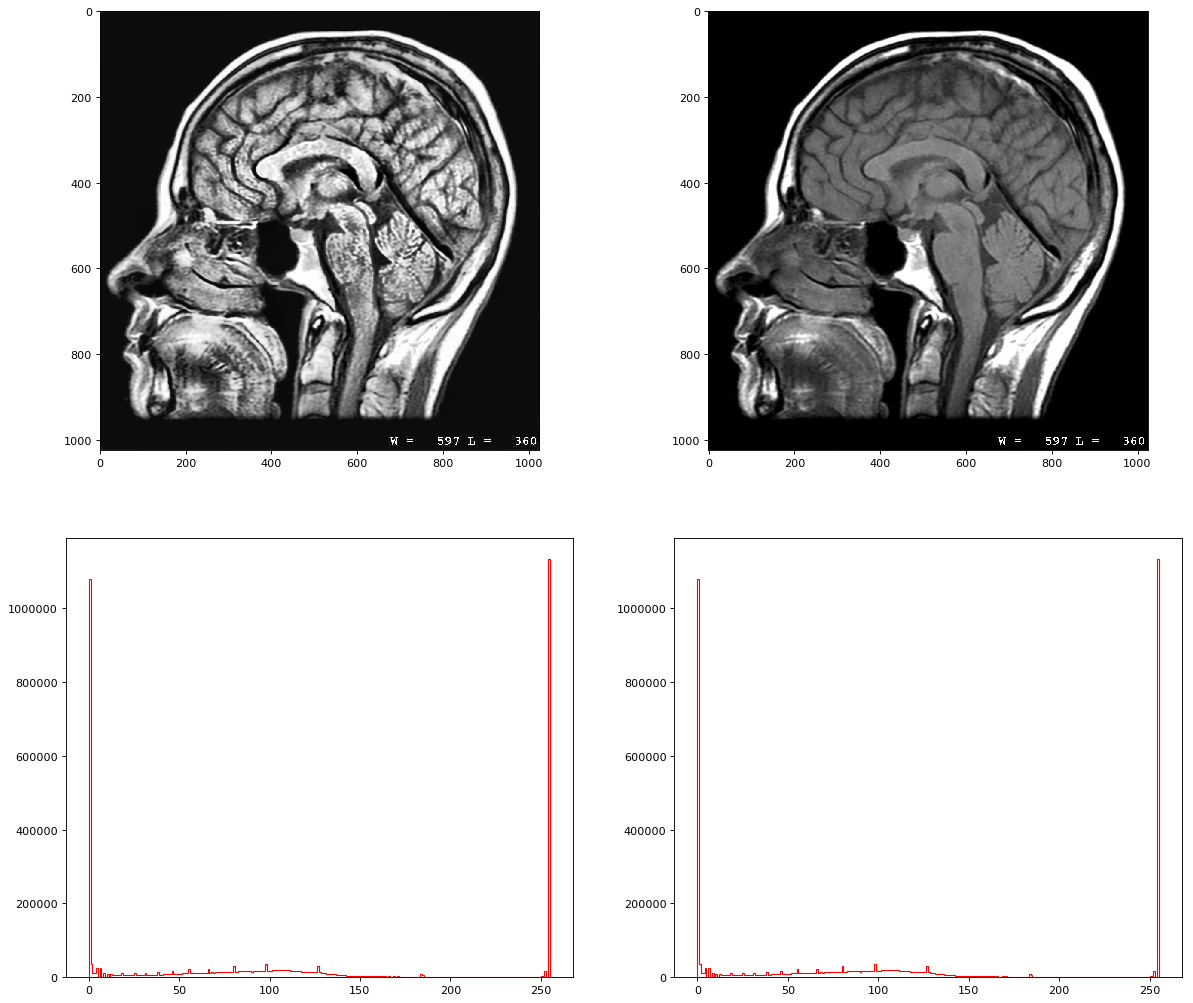

In [26]:
fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
img_adapteq = exposure.equalize_adapthist(brainpicarray, clip_limit=0.05)

plt.subplot(221)
plt.imshow(img_adapteq)
plt.subplot(222)
plt.imshow(brainpicarray)
plt.subplot(223)
ht=plt.hist(brainpicarray.ravel(), bins=256, histtype='step', color='red')
plt.subplot(224)
ht=plt.hist(brainpicarray.ravel(), bins=256, histtype='step', color='red')

C:\ProgramData\Anaconda3\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))


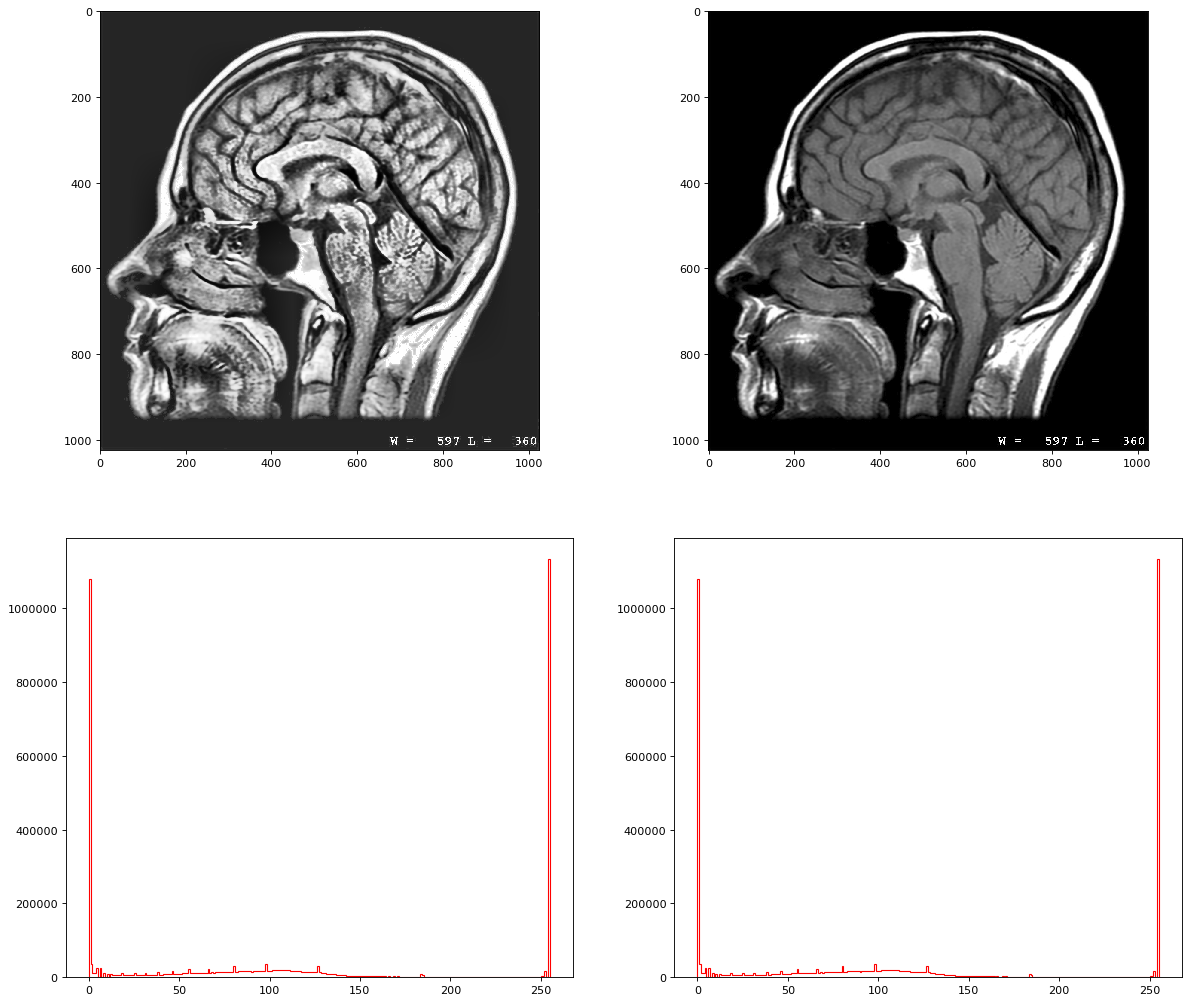

In [25]:
fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
img_adapteq = exposure.equalize_adapthist(brainpicarray, clip_limit=0.15)

plt.subplot(221)
plt.imshow(img_adapteq)
plt.subplot(222)
plt.imshow(brainpicarray)
plt.subplot(223)
ht=plt.hist(brainpicarray.ravel(), bins=256, histtype='step', color='red')
plt.subplot(224)
ht=plt.hist(brainpicarray.ravel(), bins=256, histtype='step', color='red')

 #### Conclusion


The clip_limit parameter is to change the contract of the image. The value generaly lies between 0 to 1. At 0.15 the contrast is low whereas at 0.05 the contrast is more high. 
clip_limit : float: optional(Clipping limit, normalized between 0 and 1 (higher values give more contrast)


#### Q2- Provide the syntax, parameters and a brief explanation of the function equalize hist from the Python documentation?

Syntax- skimage.exposure.equalize_hist

Histogram equalization is a method in image processing of contrast adjustment using the image's histogram. This strategy for the most part builds the worldwide difference of many pictures, particularly when the usable information of the picture is spoken to by close differentiation esteems. Through this modification, the powers can be better conveyed on the histogram. This takes into consideration territories of lower neighborhood difference to pick up a higher differentiation. Histogram leveling achieves this by successfully spreading out the most incessant force esteems.

#### Q3- Provide the syntax, parameters and a brief explanation of the function equalize adapthist from the Python documentation?

Syntax- skimage.exposure.equalize_adapthist

This is an expansion to customary Histogram Equalization system. It improves the difference of pictures by changing the qualities in the force picture. The AHE procedure can be comprehended in 
distinctive ways. In one point of view the histogram of dim levels in the yield is maximally dark; on the off chance that it has the middle esteem in its window the yield is half dim's window around every pixel is created first. The combined conveyance of 
Dim levels, that is the aggregate entirety over the histogram, is utilized to delineate information pixel Gray level to yield dim level. In the event that a pixel has a dim level lower than all others in the encompassing window.

#### Q4- In your own words, when would you use adaptive histogram equalization vs standard histogram equalization? Which one was more useful in the Notebook for you to notice details in the anatomy?

We use adaptive histogram when we need to limits the range of the output image so that you don't get big outliers. In essence, it clips values if they get too huge. whereas in order to improve the contrast of the image, without affecting the image structure or the information contained therein we use standard histogram equalization. As per the given notebook adaptive historam equalization as this method is very useful to limit MRI images.

### References

1-E. M. Haacke, R. W. Brown, M. R. Thompson, R. Venkatesan, Magnetic Resonance Imaging: Physical Principles and Sequence Design, New York:Wiley, 1999.

2- PIL1.1.3|March12,2002 Fredrik Lundh, Matthew Ellis

3- Module: exposure¶. (n.d.). Retrieved October 31, 2017, from http://scikit-image.org/docs/dev/api/skimage.exposure.html 